In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import sklearn
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
url="C:\\datasets\\winequality-red.csv"
wine = pd.read_csv(url)

In [3]:
wine = pd.read_csv(url, sep=";")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [4]:
print("Shape of Red Wine dataset: {s}".format(s = wine.shape))
print("Column headers/names: {s}".format(s = list(wine)))

Shape of Red Wine dataset: (1599, 12)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

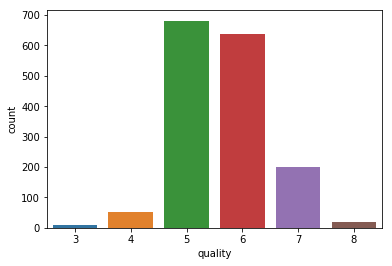

In [10]:
sns.countplot(x='quality', data=wine)

In [11]:
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['good', 'bad']
wine['rating'] = np.select(conditions, rating, default='average')
wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [12]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


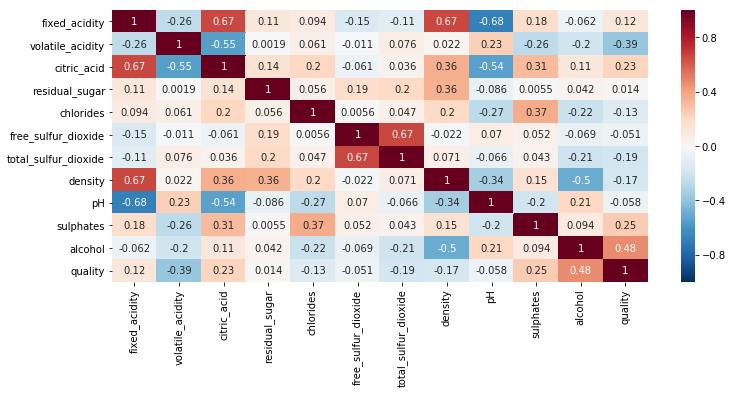

In [13]:
correlation = wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [14]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

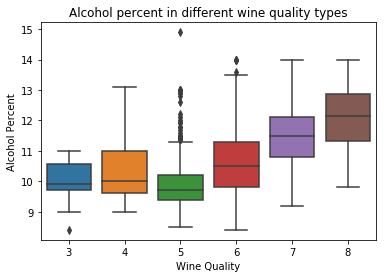

In [15]:
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Sulphates in different types of Wine ratings')]

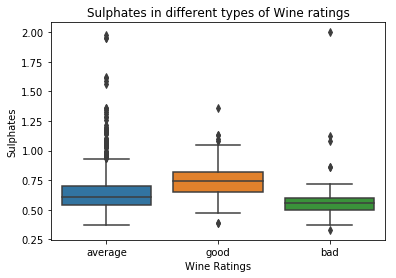

In [16]:
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Citric_acid in different types of Wine ratings')]

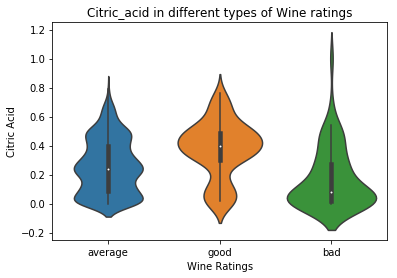

In [17]:
bx = sns.violinplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric_acid in different types of Wine ratings')

[Text(0,0.5,'pH'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'pH in different types of Wine ratings')]

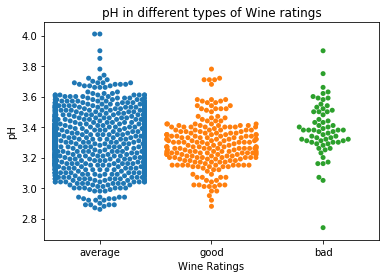

In [18]:
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

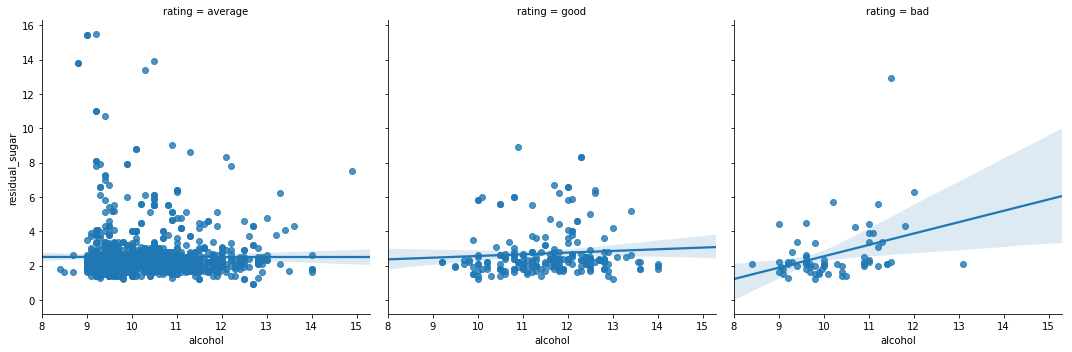

In [19]:
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)

In [20]:
wine_xtest=wine.iloc[:,0:11].values

In [21]:
wine_ytest=wine.iloc[:,11].values

In [22]:
wine_xtest

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [23]:
wine_ytest

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [24]:
standard=preprocessing.StandardScaler().fit(wine_xtest)
standard.transform(wine_xtest)

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(wine_xtest,wine_ytest,test_size=0.20,random_state=45)

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=9,random_state=45,min_samples_split=5)

In [27]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

In [28]:
y_pred=clf.predict(X_test)
accuracy_score(Y_test,y_pred)

0.671875

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(Y_test,y_pred)
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.33      0.10      0.15        10
          5       0.74      0.80      0.77       132
          6       0.67      0.67      0.67       136
          7       0.46      0.50      0.48        34
          8       0.00      0.00      0.00         4

avg / total       0.65      0.67      0.66       320



In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=0,gamma=20)
classifier.fit(X_train, Y_train)
#Predicting the Test Set
y_pred1= classifier.predict(X_test)                         

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        10
          5       0.69      0.81      0.75       132
          6       0.59      0.68      0.63       136
          7       0.20      0.06      0.09        34
          8       0.00      0.00      0.00         4

avg / total       0.56      0.63      0.59       320



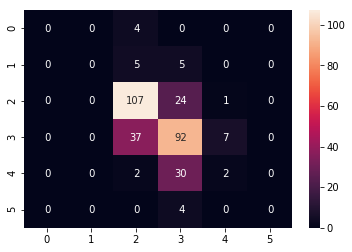

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred1)
print(classification_report(Y_test,y_pred1))
sns.heatmap(cm,annot=True,fmt='2.0f')

In [32]:
accuracies = accuracy_score(Y_test,y_pred1)
accuracies

0.628125